In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cement_slump.csv')
df.head()       

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [3]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [4]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

<Axes: >

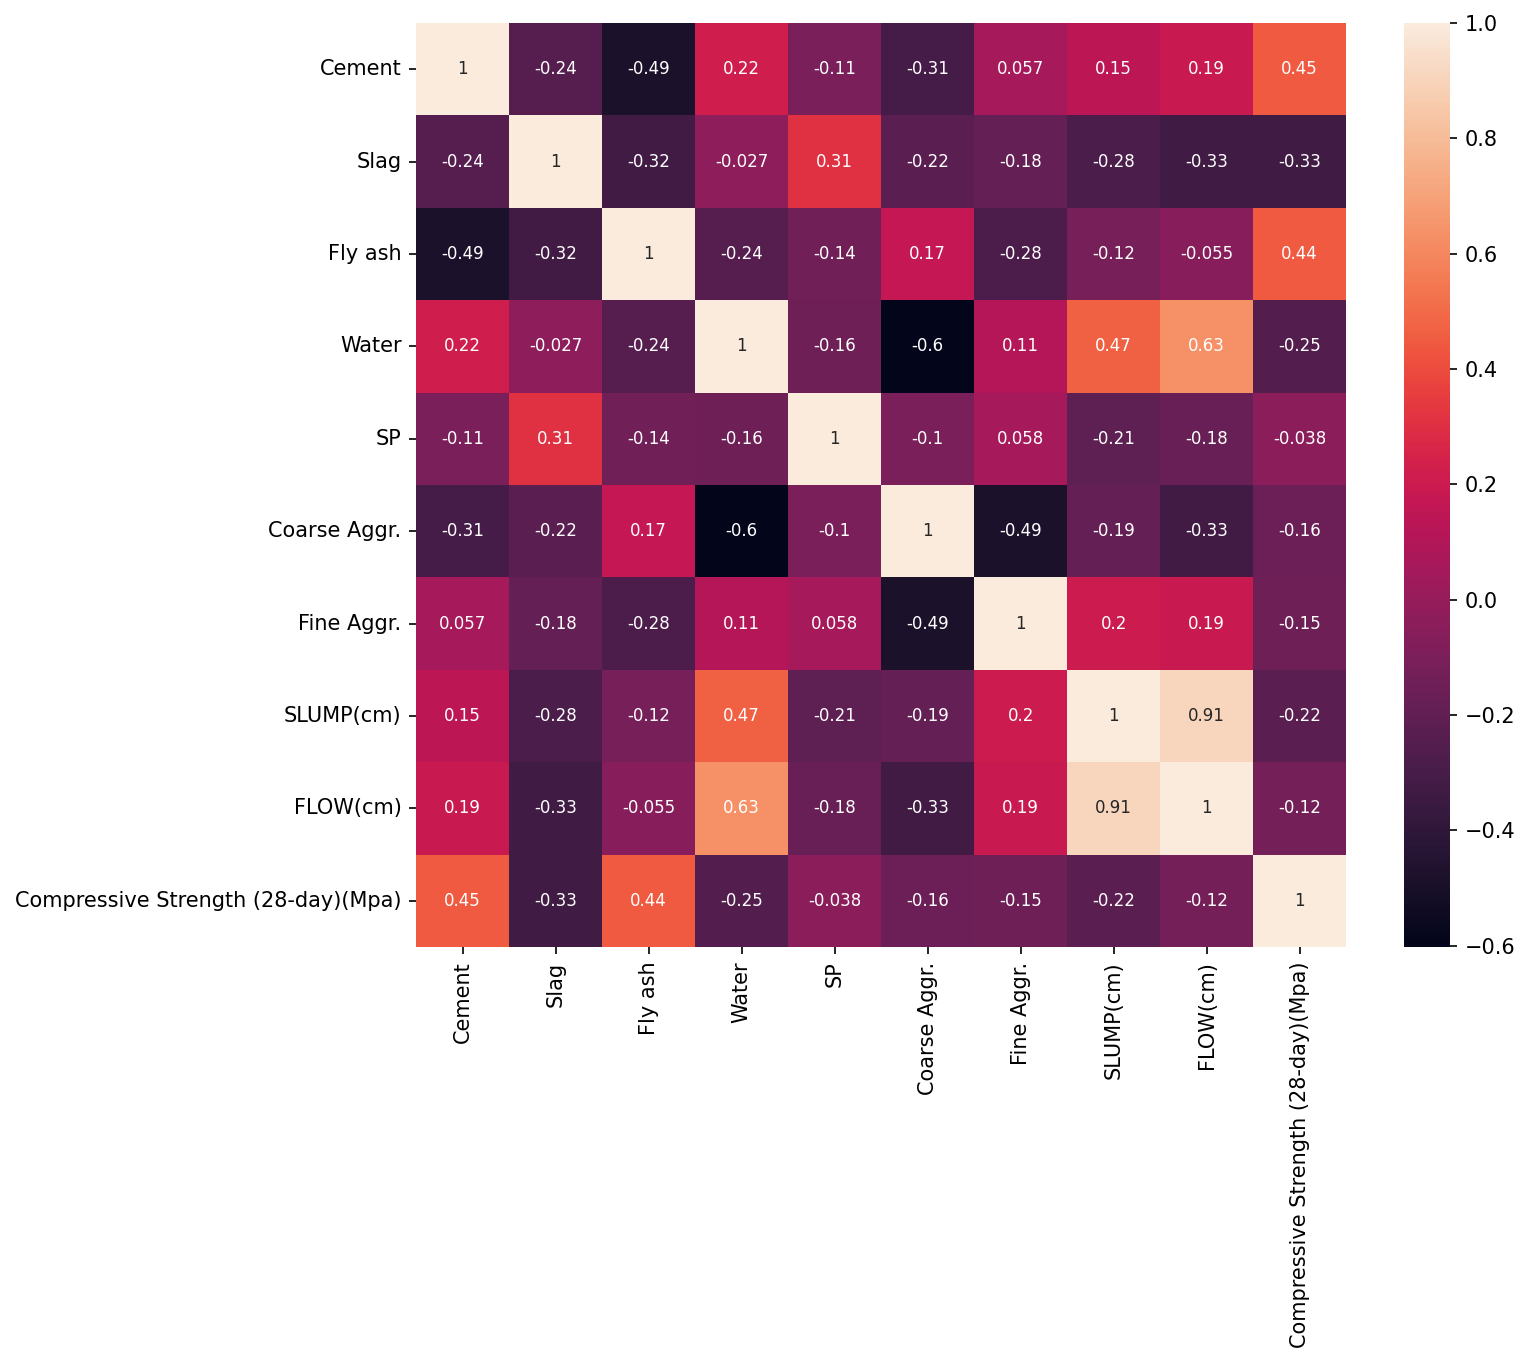

In [9]:
plt.figure(figsize=(10, 8), dpi=150)
sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize': 8})

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.svm import SVR, LinearSVR

In [16]:
base_model = SVR()

In [17]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {
    'C': np.logspace(-2, 0, 20),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'epsilon': np.logspace(-3, 0, 6)
}

In [28]:
model = GridSearchCV(base_model, param_grid)

In [29]:
model.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ]),
                         'degree': [2, 3, 4],
                         'epsilon': array([0.001     , 0.00398107, 0.01584893, 0.06309573, 0.25118864,
       1.        ]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [30]:
model.best_params_

{'C': np.float64(0.615848211066026),
 'degree': 2,
 'epsilon': np.float64(1.0),
 'gamma': 'scale',
 'kernel': 'linear'}

In [35]:
y_predicted = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mean_absolute_error(y_test, y_predicted)

2.8785270174473587

In [38]:
np.sqrt(mean_squared_error(y_test, y_predicted))

np.float64(3.5667026396640695)